In [1]:
import numpy as np
import henon_map_cpp as hm
import matplotlib.pyplot as plt

In [2]:
m = hm.matrix_4d_vector(3)

Using GPU


In [3]:
t = hm.henon_tracker(1000, 0.168, 0.201, "sps")

creating gpu tracker


In [4]:
pp = np.array([0.1,0.1,0.1])
p = hm.particles(pp, np.zeros(3), pp, np.zeros(3))

In [39]:
v = hm.vector_4d(np.array([[1.0,1.0,0.0,0.0] for i in range(3)]))

In [6]:
m.set_with_tracker(t, p, 0.0)
m.get_matrix()

array([[[ 0.66676409,  0.87018375, -0.17403675,  0.        ],
        [-0.77163829,  0.49272734, -0.09854547,  0.        ],
        [-0.19059587,  0.        ,  0.1124394 ,  0.95297934],
        [-0.06060705,  0.        , -1.0135864 ,  0.30303527]],

       [[ 0.66676409,  0.87018375, -0.17403675,  0.        ],
        [-0.77163829,  0.49272734, -0.09854547,  0.        ],
        [-0.19059587,  0.        ,  0.1124394 ,  0.95297934],
        [-0.06060705,  0.        , -1.0135864 ,  0.30303527]],

       [[ 0.66676409,  0.87018375, -0.17403675,  0.        ],
        [-0.77163829,  0.49272734, -0.09854547,  0.        ],
        [-0.19059587,  0.        ,  0.1124394 ,  0.95297934],
        [-0.06060705,  0.        , -1.0135864 ,  0.30303527]]])

In [7]:
my_matrix = np.array([[ 0.66676409,  0.87018375, -0.17403675,  0.        ],
        [-0.77163829,  0.49272734, -0.09854547,  0.        ],
        [-0.19059587,  0.        ,  0.1124394 ,  0.95297934],
        [-0.06060705,  0.        , -1.0135864 ,  0.30303527]])

In [40]:
v.get_vectors()

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

In [37]:
construct = hm.lyapunov_birkhoff_construct(3, 10)
construct.change_weights(10)
construct.get_weights()

array([0.00000000e+00, 2.12555128e-04, 2.74552446e-02, 1.21589723e-01,
       2.20498423e-01, 2.60488108e-01, 2.20498423e-01, 1.21589723e-01,
       2.74552446e-02, 2.12555128e-04])

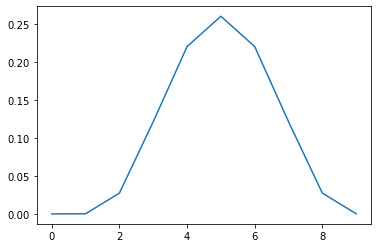

In [32]:
plt.plot(construct.get_weights())

In [11]:
v.get_vectors()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [12]:
v.multiply(m)

In [13]:
print(v.get_vectors())
print(np.log(np.linalg.norm(v.get_vectors()[0])))
print(v.normalize())
print(v.get_vectors())
print(np.linalg.norm(v.get_vectors()[0]))


[[ 0.66676409 -0.77163829 -0.19059587 -0.06060705]
 [ 0.66676409 -0.77163829 -0.19059587 -0.06060705]
 [ 0.66676409 -0.77163829 -0.19059587 -0.06060705]]
0.03848052056806427
None
[[ 0.64159405 -0.74250929 -0.18340096 -0.05831916]
 [ 0.64159405 -0.74250929 -0.18340096 -0.05831916]
 [ 0.64159405 -0.74250929 -0.18340096 -0.05831916]]
0.9999999999999999


In [41]:
construct = hm.lyapunov_birkhoff_construct(3, 10)
construct.get_weights()

array([0.00000000e+00, 2.12555128e-04, 2.74552446e-02, 1.21589723e-01,
       2.20498423e-01, 2.60488108e-01, 2.20498423e-01, 1.21589723e-01,
       2.74552446e-02, 2.12555128e-04])

In [60]:
construct.add(v)

In [61]:
print(construct.get_values_raw())
print(construct.get_values_b())

[0.34657359 0.34657359 0.34657359]
[0.34657359 0.34657359 0.34657359]


In [17]:
construct = hm.lyapunov_birkhoff_construct(3, 10)
construct.get_weights()

array([0.00000000e+00, 2.12555128e-04, 2.74552446e-02, 1.21589723e-01,
       2.20498423e-01, 2.60488108e-01, 2.20498423e-01, 1.21589723e-01,
       2.74552446e-02, 2.12555128e-04])

In [18]:
for i in range(10):
    construct.add(v)

In [19]:
print(construct.get_values_raw())
print(construct.get_values_b())

[0. 0. 0.]
[0. 0. 0.]


In [26]:
storage = hm.storage_gpu(3, 2)

In [27]:
storage.store(p)
t.track(p, 1, 0.0)
storage.store(p)

In [29]:
storage.get_x()

array([[0.1       , 0.1       , 0.1       ],
       [0.04927273, 0.04927273, 0.04927273]])

In [30]:
p.get_x()

array([0.04927273, 0.04927273, 0.04927273])